# IMPORTS 

In [476]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef


# PREPROCESSING
Importing dataset

In [477]:
bankdf = pd.read_csv('bank_marketing_dataset.csv')

Printing head

In [478]:
print(bankdf.head(10))

   age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   m

Getting more info

In [479]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Getting statistics info

In [480]:
bankdf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Checking nulls in dataset

In [481]:
bankdf.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

Checking unique values of categorical data

In [482]:
for col in bankdf.select_dtypes(include=['object']):
    print(f'\nColumn {col} uniques: {bankdf[col].unique()}')


Column job uniques: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Column marital uniques: ['married' 'single' 'divorced' 'unknown']

Column education uniques: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Column default uniques: ['no' 'unknown' 'yes']

Column housing uniques: ['no' 'yes' 'unknown']

Column loan uniques: ['no' 'yes' 'unknown']

Column contact uniques: ['telephone' 'cellular']

Column month uniques: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Column day_of_week uniques: ['mon' 'tue' 'wed' 'thu' 'fri']

Column poutcome uniques: ['nonexistent' 'failure' 'success']

Column subscribed uniques: ['no' 'yes']


Replacing 'unknown' by the mode, simple handling just to demonstrate AI 

In [483]:
for col in bankdf.select_dtypes(include=['object']):
    bankdf[col] = bankdf[col].replace('unknown', bankdf[col].mode()[0])

Handling categorical data

In [484]:
label_encoder_cols = ['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome', 'contact']

col_encoders: dict = {}
encoded_cols: dict = {}

for col in label_encoder_cols:
    encoder = LabelEncoder()
    encoded_cols[col] = encoder.fit_transform(bankdf[col])
    col_encoders[col] = encoder

for col in label_encoder_cols:
    bankdf[col] = encoded_cols[col]

In [485]:
get_dummies_cols = ['default', 'housing', 'loan', 'subscribed']

for col in get_dummies_cols:
    bankdf[col] = pd.get_dummies(bankdf[col], drop_first=True).astype(int)

# VISUALIZING
Age distribuition of clients

Text(0, 0.5, 'Frequency')

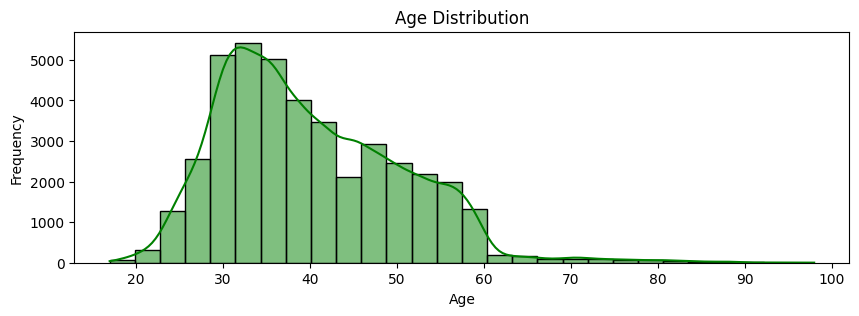

In [486]:
plt.figure(figsize=(10, 3))
sns.histplot(bankdf['age'], kde=True, bins=28, color='g')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Peak at late 20's - late 50's 

Count of job types

C:\Users\conta\AppData\Local\Temp\ipykernel_24840\3122701288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bankdf, x='job', palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

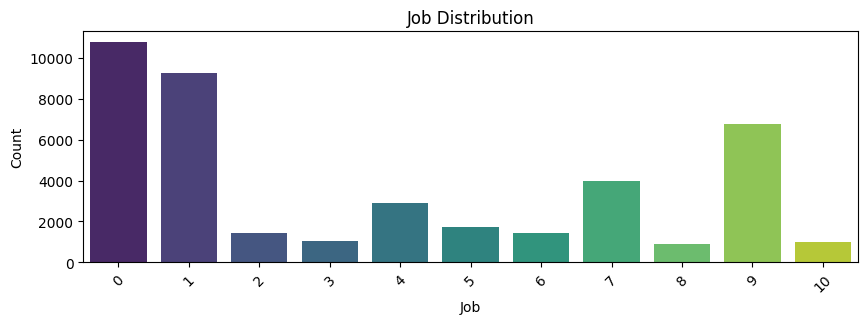

In [487]:
plt.figure(figsize=(10, 3))
sns.countplot(data=bankdf, x='job', palette='viridis')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Most job types are 0, 1 or 9

Count of Marital Status

C:\Users\conta\AppData\Local\Temp\ipykernel_24840\4175076889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bankdf, x='marital', palette='pastel')


Text(0, 0.5, 'Count')

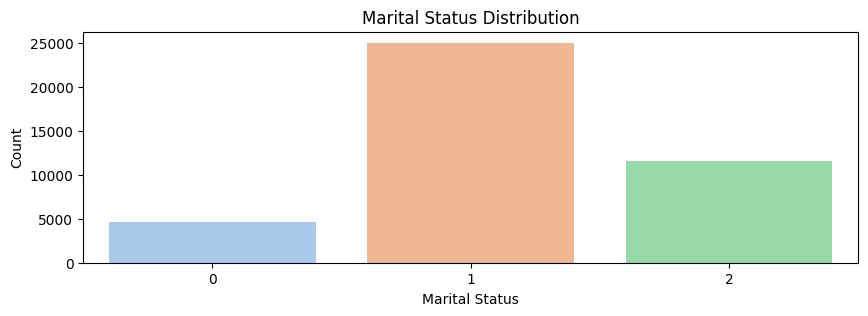

In [488]:
plt.figure(figsize=(10, 3))
sns.countplot(data=bankdf, x='marital', palette='pastel')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')

In [489]:
print(col_encoders['marital'].classes_)
print(col_encoders['marital'].transform(col_encoders['marital'].classes_))

# Married is the most common among the clients

['divorced' 'married' 'single']
[0 1 2]


Subscription x Age relation

C:\Users\conta\AppData\Local\Temp\ipykernel_24840\3163521844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bankdf, x='subscribed', y='age', palette='coolwarm')


Text(0, 0.5, 'Age')

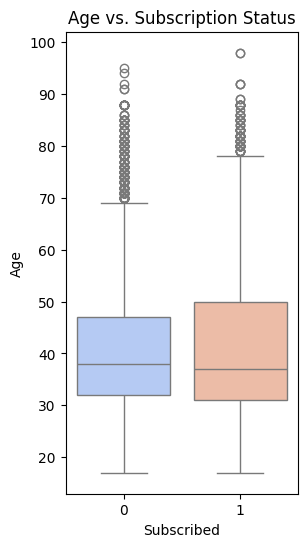

In [490]:
plt.figure(figsize=(3, 6))
sns.boxplot(data=bankdf, x='subscribed', y='age', palette='coolwarm')
plt.title('Age vs. Subscription Status')
plt.xlabel('Subscribed')
plt.ylabel('Age')

# Most subscribed clients are in the range of age of mid 30's to mid 40's 

Job Type x Subscription relation count

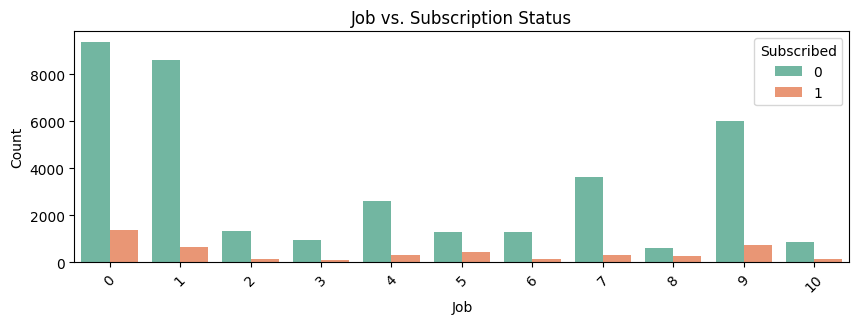

In [491]:
plt.figure(figsize=(10, 3))
sns.countplot(data=bankdf, x='job', hue='subscribed', palette='Set2')
plt.title('Job vs. Subscription Status')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed')

Relations heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'job'),
  Text(0, 2.5, 'marital'),
  Text(0, 3.5, 'education'),
  Text(0, 4.5, 'default'),
  Text(0, 5.5, 'housing'),
  Text(0, 6.5, 'loan'),
  Text(0, 7.5, 'contact'),
  Text(0, 8.5, 'month'),
  Text(0, 9.5, 'day_of_week'),
  Text(0, 10.5, 'duration'),
  Text(0, 11.5, 'campaign'),
  Text(0, 12.5, 'pdays'),
  Text(0, 13.5, 'previous'),
  Text(0, 14.5, 'poutcome'),
  Text(0, 15.5, 'emp.var.rate'),
  Text(0, 16.5, 'cons.price.idx'),
  Text(0, 17.5, 'cons.conf.idx'),
  Text(0, 18.5, 'euribor3m'),
  Text(0, 19.5, 'nr.employed'),
  Text(0, 20.5, 'subscribed')])

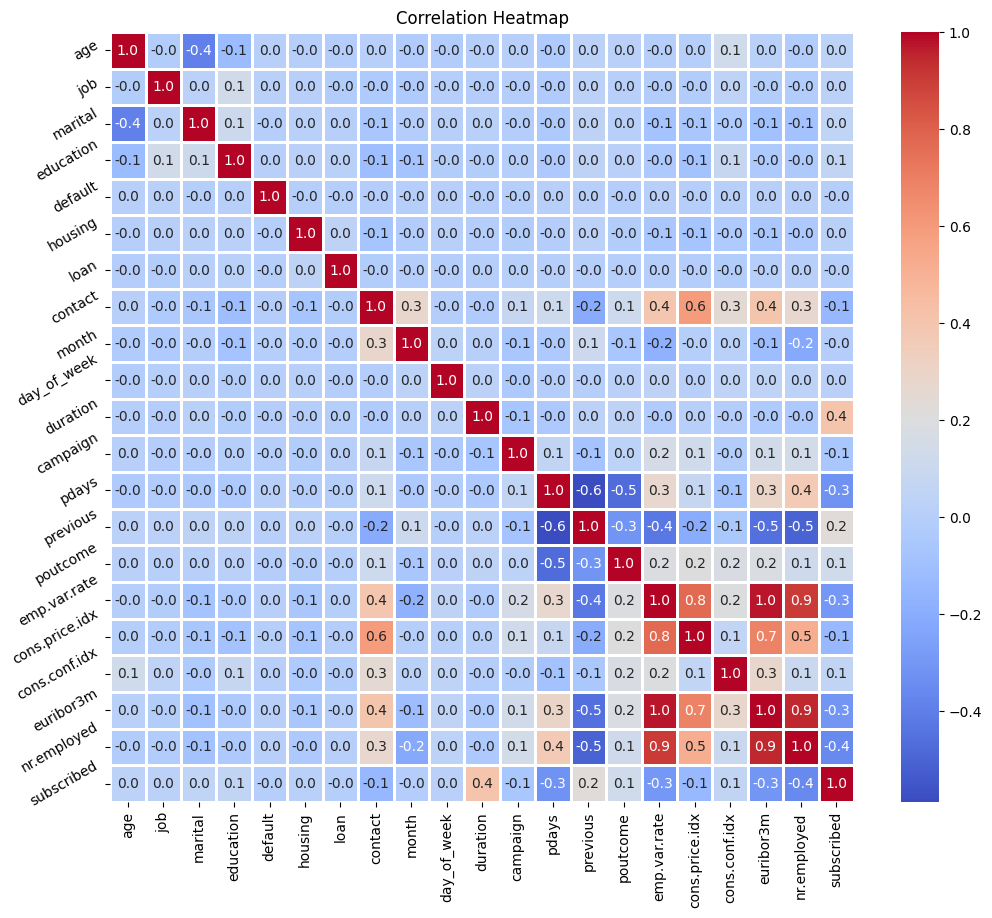

In [492]:
plt.figure(figsize=(12, 10))
sns.heatmap(bankdf.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=1)
plt.title('Correlation Heatmap')
plt.yticks(rotation=30)

Relations clustermap

(array([-1. , -0.5,  0. ,  0.5,  1. ]),
 [Text(1, -1.0, '−1.0'),
  Text(1, -0.5, '−0.5'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.5, '0.5'),
  Text(1, 1.0, '1.0')])

<Figure size 1200x1000 with 0 Axes>

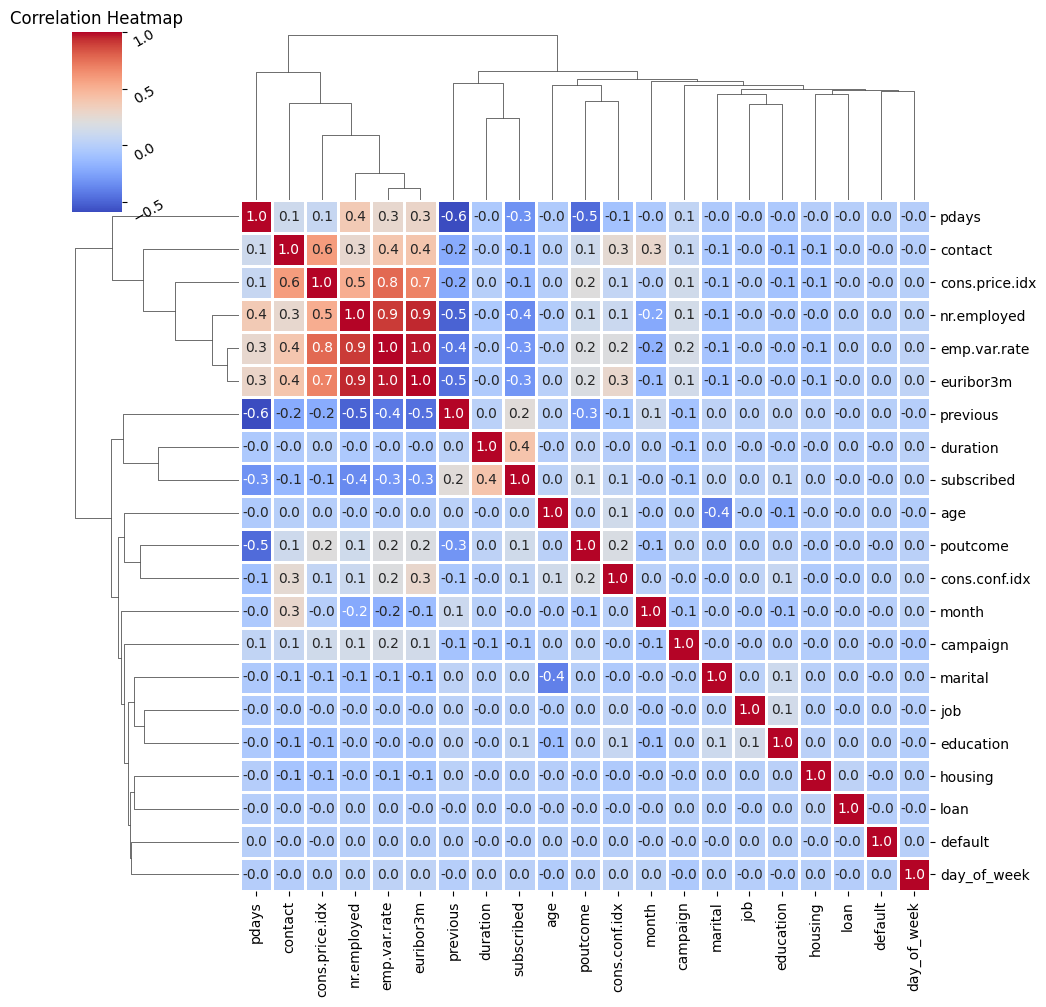

In [493]:
plt.figure(figsize=(12, 10))
sns.clustermap(bankdf.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=1)
plt.title('Correlation Heatmap')
plt.yticks(rotation=30)

Subscriptions by month relation 

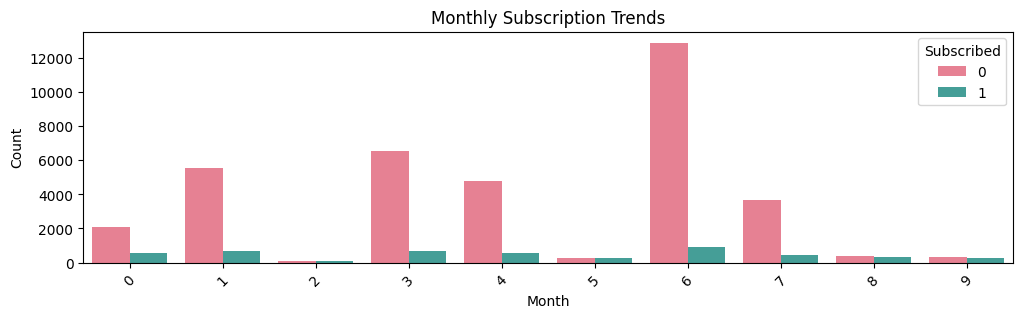

In [494]:
plt.figure(figsize=(12, 3))
sns.countplot(data=bankdf, x='month', hue='subscribed', palette='husl')
plt.title('Monthly Subscription Trends')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed')

Subscription by contact type

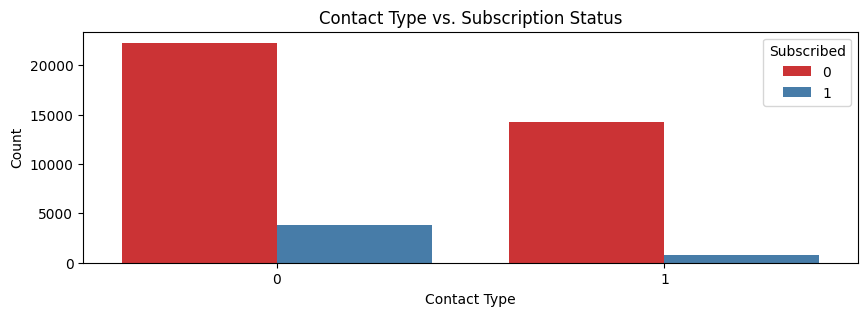

In [495]:
plt.figure(figsize=(10, 3))
sns.countplot(data=bankdf, x='contact', hue='subscribed', palette='Set1')
plt.title('Contact Type vs. Subscription Status')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.legend(title='Subscribed')

Balancing subscription data by sampling

Text(0, 0.5, 'Count')

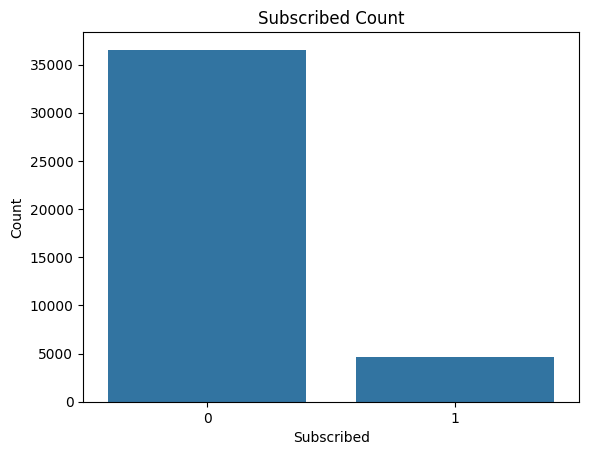

In [496]:
sns.countplot(data=bankdf, x='subscribed')
plt.title('Subscribed Count')
plt.xlabel('Subscribed')
plt.ylabel('Count')

In [497]:
bankdf.loc[bankdf['subscribed'] == 1].shape

(4640, 21)

In [498]:
samples: pd.DataFrame = bankdf.loc[bankdf['subscribed'] == 0].sample(4640)

In [499]:
bankdf = pd.concat([bankdf.loc[bankdf['subscribed'] == 1], samples])
bankdf = bankdf.reset_index(drop=True)

# AI

In [500]:
bankdf.corr()['subscribed'][bankdf.corr()['subscribed'] > 0.09]

education     0.092694
duration      0.461731
previous      0.264077
poutcome      0.156291
subscribed    1.000000
Name: subscribed, dtype: float64

Data separation

In [501]:
X: pd.DataFrame = bankdf[['duration', 'previous', 'poutcome']]
y: pd.Series = bankdf['subscribed']

Splitting sets

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [503]:
classifier = DecisionTreeClassifier()

In [504]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [505]:
predictions = classifier.predict(X_test)

In [507]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[1515  340]
 [ 637 1220]]


In [508]:
print('Classification Report:')
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      1855
           1       0.78      0.66      0.71      1857

    accuracy                           0.74      3712
   macro avg       0.74      0.74      0.74      3712
weighted avg       0.74      0.74      0.74      3712



In [509]:
print(f'Matthews Correlation Coefficient: {matthews_corrcoef(y_test, predictions):.2f}')

Matthews Correlation Coefficient: 0.48
